In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.metrics import f1_score, make_scorer, accuracy_score , recall_score, precision_score
from sklearn.metrics import confusion_matrix 
from sklearn.utils import class_weight
from sklearn.feature_selection import RFE 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 
from keras.models import Sequential 
from tensorflow.keras.models import Sequential
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [66]:
import random
import itertools
import scipy
import warnings
import os

In [67]:
data = pd.read_csv('dataset/data.csv')

In [68]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [69]:
print("Shape of Data:" , data.shape)
r , c = data.shape
print("Number of Rows: " , r)
print("Number of Columns: " , c)

Shape of Data: (6819, 96)
Number of Rows:  6819
Number of Columns:  96


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [71]:
# no of null value
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [72]:
# no of duplicate value
data.duplicated().sum()

0

In [73]:
# Descriptive Statistics
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# target variable analysis

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


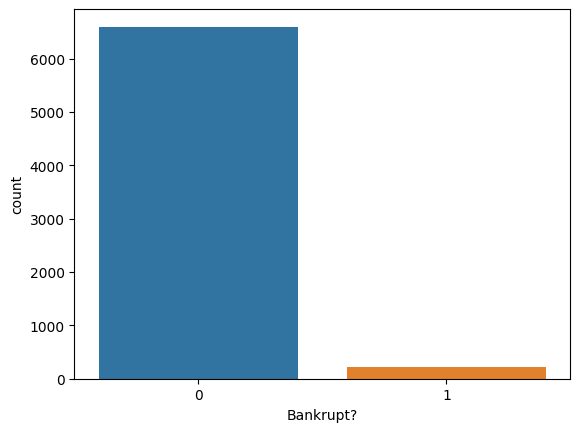

In [74]:
print(data['Bankrupt?'].value_counts())
plt.figure()
sns.countplot( x = 'Bankrupt?' , data = data)
plt.show()

# variabale-target analysis

In [75]:
features = data.columns[1:]
X = data[features]
y = data["Bankrupt?"]

X_0 = X.loc[y==0, : ] # not bankrupted
X_1 = X.loc[y==1, : ] #bankrupted

In [76]:
X_0_test = X_0.sample(n=220)

significant_cols = []

difs = []

for col in X.columns:
    relative_means_difference = (X_1[col].mean() - X_0_test[col].mean()) / X_0_test[col].mean()
    difs.append([col , relative_means_difference])
    if abs(relative_means_difference) > 0.5: #thresnhold, at least 50% freater/smaller mean
        significant_cols.append(col)
        

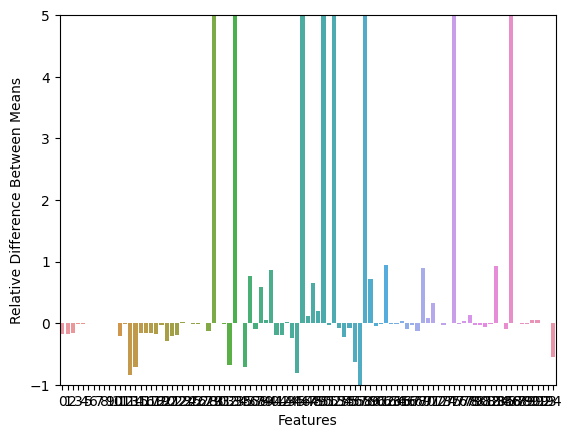

In [77]:
sns.barplot(x = list(range(len(difs))), y = [e[1] for e in difs])
plt.ylim((-1, 5)) # for the size of the window displayed
plt.xlabel("Features")
plt.ylabel("Relative Difference Between Means")
plt.show()

In [78]:
from statistics import mean 
#sampling distribution of sample means for each feature
sampling_distribution = {features : [] for features in features}

#mean of each feature
bankrupt_means = {feature: X_1[feature].mean() for feature in features}
for i in range(1000):
    X_sample = X.sample(n=220)
    for feature in features:
        s_mean = X_sample[feature].mean()
        sampling_distribution[feature].append(s_mean)

pvalues = {feature : None for feature in features}

def get_p_value(sampling_distribution, observed):
    l = abs(observed-mean(sampling_distribution)) #distance of observed from the sample mean
    return sum(abs(sample_mean-mean(sampling_distribution))>l for sample_mean in sampling_distribution)/len(sampling_distribution) #the proportion of data more extreme than observed

for feature in pvalues: #filling the pvalues dictionary
    pvalues[feature] = get_p_value(sampling_distribution[feature],bankrupt_means[feature]) 

In [79]:
print("Number of significantly different features: %d" %sum(np.array(list(pvalues.values()))>0.05))
dict(itertools.islice(pvalues.items(),10)) #look at the first 10 features and associated p-values

Number of significantly different features: 33


{' ROA(C) before interest and depreciation before interest': 0.0,
 ' ROA(A) before interest and % after tax': 0.0,
 ' ROA(B) before interest and depreciation after tax': 0.0,
 ' Operating Gross Margin': 0.0,
 ' Realized Sales Gross Margin': 0.0,
 ' Operating Profit Rate': 0.982,
 ' Pre-tax net Interest Rate': 0.117,
 ' After-tax net Interest Rate': 0.106,
 ' Non-industry income and expenditure/revenue': 0.127,
 ' Continuous interest rate (after tax)': 0.095}

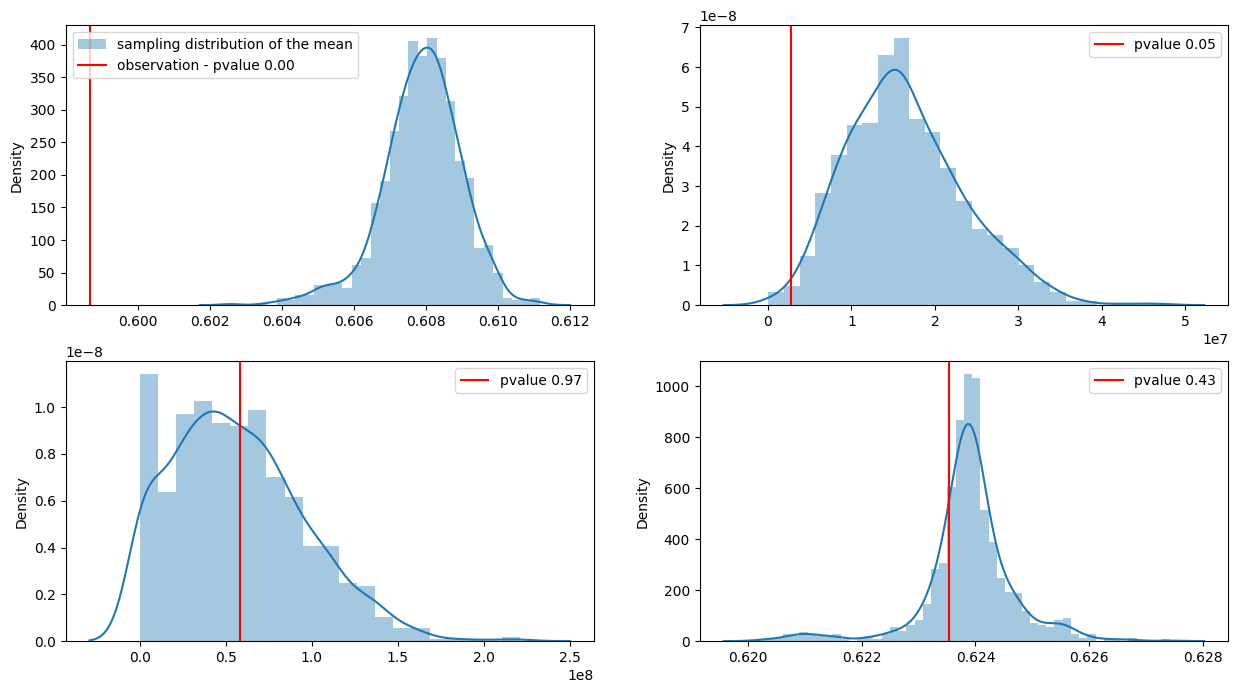

In [80]:
# Plotting some features and their distribution of sample means + red line with the mean of the observed data (= data of bankrupt companies)

fig, axes = plt.subplots(2,2, figsize=(15,8))

sns.distplot(sampling_distribution[" Operating Gross Margin"], ax=axes[0,0],label="sampling distribution of the mean")
axes[0,0].axvline(x=bankrupt_means[" Operating Gross Margin"],label="observation - pvalue %.2f"%pvalues[" Operating Gross Margin"],c="r")
axes[0,0].legend(loc='upper left')

sns.distplot(sampling_distribution[" Interest-bearing debt interest rate"], ax=axes[0,1])
axes[0,1].axvline(x=bankrupt_means[" Interest-bearing debt interest rate"],label="pvalue %.2f"%pvalues[" Interest-bearing debt interest rate"],c="r")
axes[0,1].legend()

sns.distplot(sampling_distribution[" Inventory/Current Liability"], ax=axes[1,0])
axes[1,0].axvline(x=bankrupt_means[" Inventory/Current Liability"],label="pvalue %.2f"%pvalues[" Inventory/Current Liability"],c="r")
axes[1,0].legend()

sns.distplot(sampling_distribution[" No-credit Interval"], ax=axes[1,1])
axes[1,1].axvline(x=bankrupt_means[" No-credit Interval"],label="pvalue %.2f"%pvalues[" No-credit Interval"],c="r")
axes[1,1].legend()

plt.legend()
plt.show()


# Correlation

In [81]:
# correlation between predictor variables

cor_matrix = data.corr().abs()
cor_matrix.style.background_gradient(sns.light_palette('red' , as_cmap= True))

In [82]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) #upper triangle of the correlation matrix

dropped_cols = set()
for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.9): #more than 0.9 corr. coeficient -> dropped
        dropped_cols.add(feature)

print("There are %d dropped columns" %len(dropped_cols))

X = X.drop(dropped_cols,axis=1)
X.head()

There are 19 dropped columns


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490


# PCA

In [83]:
scaler = StandardScaler() 
X_for_pca = pd.DataFrame(data=scaler.fit_transform(X),index=X.index,columns=X.columns) #standardized dataset

n_components = 10

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_for_pca)
X_pc = pd.DataFrame(data=principal_components, columns=['PC %d'%d for d in range(n_components)])

print("Explained variance by 10 components %.2f" %sum(pca.explained_variance_ratio_))

Explained variance by 10 components 0.42


# Data Imbalance (SMOTE)

In [84]:
sm = SMOTE(random_state = 42)
X_sm , y_sm = sm.fit_resample(X, y )
print("New Balance of 1 and 0 classes (%) : ")
y_sm.value_counts()

New Balance of 1 and 0 classes (%) : 


Bankrupt?
1    6599
0    6599
Name: count, dtype: int64

In [85]:
#create list contain [accuracy, F!-measure, Recall, Precision]
mod = []
accuracy = []
Recall =[] 
Precision = []
F1_measure = []

In [86]:
#stratify address the unbalance only in the train test splitting
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)

In [87]:
#Select 30 Features
X_train_10 = X_train.iloc[:,:10]
X_test_10 = X_test.iloc[:,:10]

#Select 50 Features
X_train_50 = X_train.iloc[:,:50]
X_test_50 = X_test.iloc[:,:50]

#Select 100 Features
X_train_70 = X_train.iloc[:,:70]
X_test_70 = X_test.iloc[:,:70]

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight

In [89]:
def train_test_RandomForest(X, X_test_):
    """Function finds the optimal hyperparameters of the Random Forest Classifier, plots the confusion matrix of test data, and returns the model"""
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    sw_train = compute_sample_weight(class_weight='balanced', y=y_train)
    
    steps = [('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier())]
    pipeline = Pipeline(steps)
    
    # Random Forest Classifier hyperparameters
    param_grid = {
        'RandomForest__n_estimators': [10, 20, 30],
        'RandomForest__max_depth': [None, 10, 20],
        'RandomForest__min_samples_split': [2, 5],
        'RandomForest__class_weight': ['balanced', None]
    }
    
    f1 = make_scorer(f1_score, average='macro')
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=f1, verbose=0)
    grid.fit(X, y_train, RandomForest__sample_weight=sw_train)
    
    print("best parameters: ")
    print(grid.best_params_)
    
    model = grid.best_estimator_
    y_pred = model.predict(X_test_)
    
    print("f1 score is %.2f" % f1_score(y_test, y_pred))
    print("Precision: %.2f" % precision_score(y_test, y_pred))
    print("Recall: %.2f" % recall_score(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score for Random Forest Model: {:.2f} %".format(acc*100))
    mod.append('RF')
    accuracy.append(acc)
    F1_measure.append(f1_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    return model

# training and testing SMOTE

In [90]:
model1 = train_test_RandomForest(X_train_10, X_test_10)

best parameters: 
{'RandomForest__class_weight': None, 'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 30}
f1 score is 0.95
Precision: 0.93
Recall: 0.98
Accuracy score for Random Forest Model: 94.96 %


In [91]:
model2 = train_test_RandomForest(X_train_50, X_test_50)

best parameters: 
{'RandomForest__class_weight': None, 'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 20}
f1 score is 0.97
Precision: 0.96
Recall: 0.99
Accuracy score for Random Forest Model: 97.42 %


In [92]:
model3 = train_test_RandomForest(X_train_70, X_test_70)


best parameters: 
{'RandomForest__class_weight': None, 'RandomForest__max_depth': 20, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 20}
f1 score is 0.98
Precision: 0.96
Recall: 0.99
Accuracy score for Random Forest Model: 97.54 %


In [95]:
model3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RandomForest',
                 RandomForestClassifier(max_depth=20, n_estimators=20))])

In [97]:
import joblib

In [100]:
joblib.dump(model3,'company_bankcruptcy_prediction.sav')

['company_bankcruptcy_prediction.sav']